<div class="title">Practical Assignment: Dimensionality Reduction</div>
<div class="subtitle">Métodos Avanzados en Aprendizaje Automático</div>
<div class="author">Ángela Fernández Pascual - Universidad Autónoma de Madrid</div>

---

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [194]:
#%%html
#<head><link rel="stylesheet" href="style.css"></head>

In [195]:
#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

This cell imports the packages to be used (all of them quite standard).

In [196]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('figure', figsize=(15, 5))
seed = 123

# Introduction

This practical assignment consists in implementing a simplified version of the KernelPCA class of `sklearn`.

This class will contain three public methods: `fit()`, `transform()` and `fit_transform()`.

# Implementation of KPCA

## Requirements

The objective of this assignment is to complete the class `KPCA` sketched below, which should contain at least the following methods.

---
```python
__init__(self, n_components, kernel, gamma)
```
* This is the construction method for the class, with the following parameters:
    * `n_components`: Reduced dimension.
    * `kernel`: `'linear'` or `'rbf'`.
    * `gamma`: Kernel parameter $\gamma$ of the RBF kernel.
* This method should only store the parameters in fields of the class, to be used when needed.

---
```python
fit(self, X)
```
* This is the training method, with the following parameters:
    * `X`: Training data matrix $\mathbf{X}$.
* This method should compute the projecting direction, storing the useful information in fields of the class.

---
```python
transform(self, X)
```
* This is the method that computes the projection, with the following parameters:
    * `X`: New data matrix $\mathbf{X}$.
* This method will used the stored information in the class for projecting new points.
---
```python
fit_transform(self, X)
```
* This method firstly fit the model, and latter apply it over the training data, with the following parameters:
    * `X`: Training data matrix $\mathbf{X}$.
* **NOTE**: This method can be implemented just calling the methods `fit` and `transform`; but also it can be computed more efficiently by theoretically computing the projection in this case. If this second approach is chosen, a brief explanation of why the implemented code is working will be required.

### Some recommendations:

* We will not pay attention to the dataset size when solving the eigenvector problem, the examples used will be simple ones. We recommend the use of `eigs` from `scipy` that computes only the first `k` eigenvalues and eigenvectors. It will be necessary to ensure that the eigenvectors are ordered in terms of the largest eigenvalues.
* The projection direction should be deterministic, so the eigenvectors finded should be flipped in terms of their sign to obtain always the same result.
* Data should be centered inside the method (so the data has zero mean, but the std remains the same), being careful to also center the new data points.
* Remember that the projection direction should have norm 1. This means that during the training the computed eigenvectors should be properly normalized and stored once normalized.

## Implementation

<div class="qst">

* Complete the `KPCA` class below, satisfying the described requirements.

</div>

In [197]:
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from sklearn.preprocessing import StandardScaler

class KPCA():
    """
        Kernel PCA.
    """
    def __init__(self, n_components, kernel, gamma=None):
        '''
        Configuración de los valores iniciales para el método de reducción de dimensionalidad Kernel PCA
        Parámetros: 
        - `n_component`: número de componentes. 
        - `kernel`: string o function, si es un string debe de ser `linear` o `rbf`
        - `gamma : float `: Hiperparámetro del método de Kernel PCA 
        '''
        # Assignment of the hyper-parameters (complete).
        
        self.n_components = n_components # Dimensión a reducir 
        self.kernel = kernel

        # Comprobaciones del gamma 
        if gamma != None and not (isinstance(gamma, float) or isinstance(gamma, int)) :
            raise AttributeError(f'Not valid gamma type, should be an integer or float but {type(gamma)} found')
        if isinstance(gamma, int) and gamma < 0: 
            raise AttributeError(f'Not valid gamma value, should be positive but {gamma} found')
        
        # Asignamos una función adicional
        if self.kernel == 'rbf':
            self.kernel_function= lambda X, Y : rbf_kernel(X, Y, gamma)
            #self.kernel_vector = lambda X, Y : RBF(X, Y, gamma)
        elif self.kernel == 'linear':
            self.kernel_function = lambda X, Y: linear_kernel(X, Y)
        elif callable(kernel): # Permitimos que además se le pueda añadir una función adicional
            self.kernel_function = kernel
        else:
            raise AttributeError(f'Not valid kernel type: {self.kernel}')

        # Scaler
        self.scaler = StandardScaler(with_std = False) # No queremos que nos modifique la varianza de los datos (pero sí la media)

    def fit(self, X):
        # Computation of the projection direction (complete).
        # ...
        self.scaler.fit(X) # Trasladamos los datos para que tenga media 0
        self.X_centered = self.scaler.transform(X)
     
        # Sacamos el kernel
        #N = len(X)
        self.kernel_matrix= self.kernel_function(self.X_centered,self.X_centered) 

        # TODO: utilizar eig scipy
        valores_propios , vectores_propios = np.linalg.eig(self.kernel_matrix)
        valor_vector = list(zip(valores_propios, vectores_propios))
        valor_vector.sort(key = lambda k: k[0], reverse = True) # ordenamos en orden de vector propio
        valor_vector = valor_vector[: self.n_components]
        print('valor vector', valor_vector)
        # Escalar la a 
        self.a_escalada = list( map( lambda k: k[1]/ np.sqrt(k[0]), valor_vector) )
        # Guardamos los valores
        self.L = list( map( lambda k: k[0], valor_vector) )

        return self

    def transform(self, X):
        # Computation of the projected components (complete).
        X_new_centered = self.scaler.transform(X)
        kernel_matrix = self.kernel_function(self.X_centered, X_new_centered)
        
        return self.a_escalada @ kernel_matrix

    def fit_transform(self, X = None):
        # Computation of the projected components over X just after training with it (complete).
        # ...
        return np.multiply(self.a_escalada, self.L)

        

       

# Experiments with KPCA

## Comparative with *scikit-learn*

The following cell generates the *blobs* dataset and depicts it.

(90, 2)


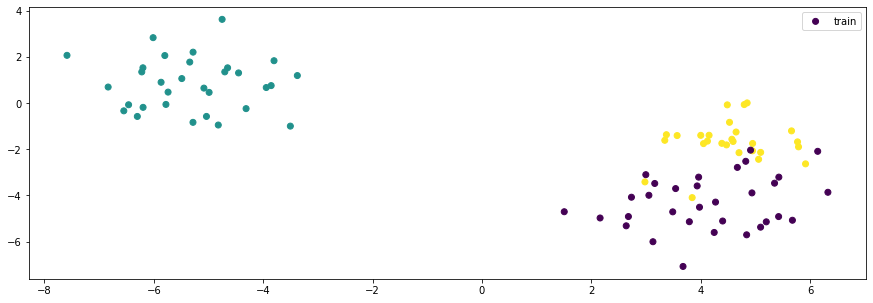

In [198]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=seed)
X_train = X[:90,:]; y_train=y[:90]
X_new = X[90:,:]; y_new=y[90:]
print(X_train.shape)
# Borrar
#X_train = np.array([[1 ,-1], [0,1], [2,0]])
#y_train = np.array([1,-1,1])

plt.scatter(X_train[:,0], X_train[:,1],c=y_train, label='train')
#plt.scatter(X_new[:,0], X_new[:,1], c=y_new, marker='s', label='new')
plt.legend()
plt.show()

<div class="qst">

* Train and transform a classical PCA model over the training data (`X_train`), using both the implemented `KPCA` class using a linear kernel and the `PCA` class of `sklearn`.
* Transform using the previous two models the new data (`X_new`).
* Compare that both classes provide the same outputs (in terms of the eigenvectors and the data projections), describing the obtained results.
</div>

In [199]:
from sklearn.decomposition import PCA

kernel = 'linear'
n_components=1

model_my = KPCA(n_components=n_components, kernel='linear')
model_sk = PCA(n_components=n_components)

# Training of the model
model_my.fit(X_train)
model_sk.fit(X_train)

# Comparative of the eigenvectors (complete).
# ...
print('sklearn',model_sk.components_)
print('sklearn',model_my.a_escalada)
#print('my model', model_my.a_escalada[:3][:3])

# Comparative of the projections 


valor vector [((2278.542245808905+0j), array([-8.12361899e-02+0.j        , -1.42674741e-01+0.j        ,
       -1.51567393e-01+0.03088748j, -1.51567393e-01-0.03088748j,
        5.76431979e-02+0.j        ,  1.05401397e-03+0.j        ,
       -6.01144336e-02+0.j        , -1.28586931e-03+0.00345763j,
       -1.28586931e-03-0.00345763j,  1.04323477e-01+0.j        ,
       -3.25785265e-03+0.j        ,  1.19807585e-01+0.j        ,
       -8.55452538e-02-0.05092931j, -8.55452538e-02+0.05092931j,
        1.03911082e-02+0.j        , -1.41183095e-02+0.j        ,
       -2.35212180e-02+0.j        ,  4.52903203e-02+0.02028186j,
        4.52903203e-02-0.02028186j, -4.80960968e-02+0.00831084j,
       -4.80960968e-02-0.00831084j,  1.41063043e-01+0.j        ,
        6.28913634e-02+0.j        , -3.75404268e-02+0.j        ,
       -1.33977870e-04+0.j        , -1.92641904e-02+0.j        ,
        4.52517162e-02-0.02332511j,  4.52517162e-02+0.02332511j,
        5.81917636e-02+0.j        ,  7.89696220e-03

/Users/blancacanocamarero/miniforge3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


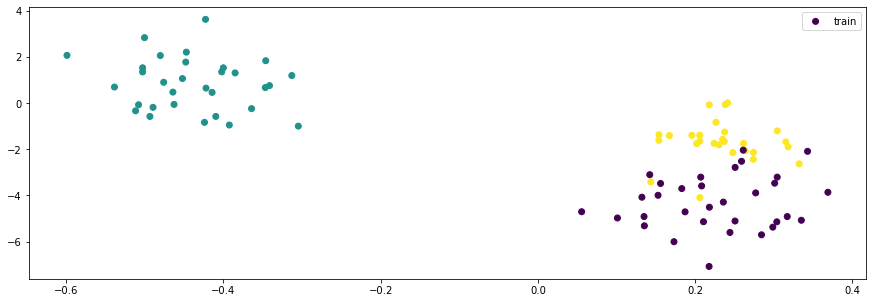

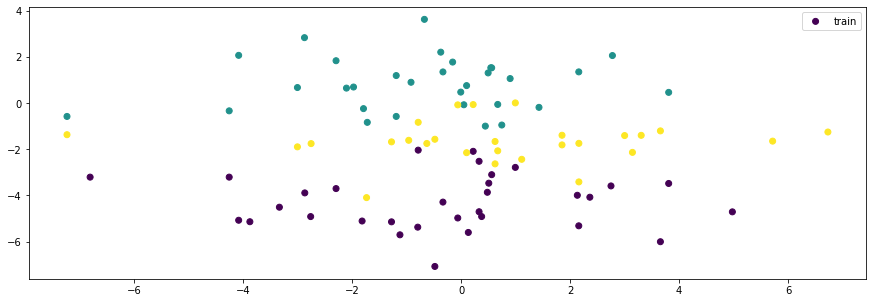

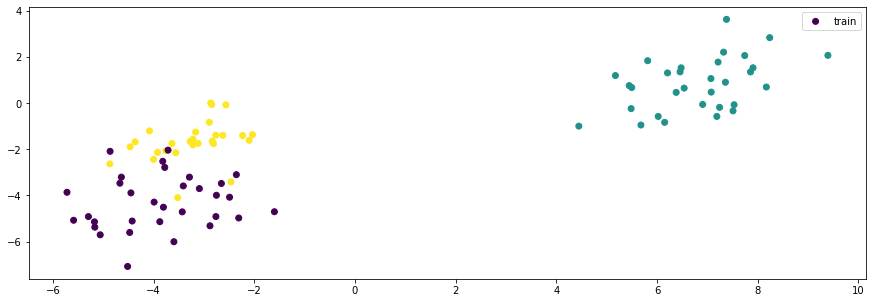

In [200]:

plt.scatter(model_my.transform(X_train), X_train[:,1],c=y_train, label='train')
#plt.scatter(X_new[:,0], X_new[:,1], c=y_new, marker='s', label='new')
plt.legend()
plt.show()

plt.scatter(model_my.fit_transform(X_train), X_train[:,1],c=y_train, label='train')
#plt.scatter(X_new[:,0], X_new[:,1], c=y_new, marker='s', label='new')
plt.legend()
plt.show()


# PCA
plt.scatter(model_sk.transform(X_train), X_train[:,1],c=y_train, label='train')
#plt.scatter(X_new[:,0], X_new[:,1], c=y_new, marker='s', label='new')
plt.legend()
plt.show()

<div class="qst">

* Train and transform a Kernel PCA model using a RBF kernel over the training data (`X_train`), calling both the implemented `KPCA` class and the `KernelPCA` class of `sklearn`.
* Transform using the previous two models the new data (`X_new`).
* Compare that both classes provide the same outputs (in terms of the eigenvectors and the data projections), describing the obtained results.
</div>

In [201]:
from sklearn.decomposition import KernelPCA

kernel = 'rbf'
n_components=1

# Model definition (complete).
model_my = KPCA()
model_sk = KernelPCA()

# Training of the models (complete).
# ...

# Comparative of the eigenvectors (complete).
# ...

# Comparative of the projections (complete).
# ...

TypeError: __init__() missing 2 required positional arguments: 'n_components' and 'kernel'

## Comparing linear kernel against Gaussian kernel

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=1e-1, random_state=seed)

plt.scatter(X[:,0], X[:,1],c=y)

<div class="qst">

* Using the implemented class `KPCA` compare the result of transforming the above dataset using a linear kernel and an RBF one (looking for an appropriated hyperparameter `gamma` value).
* Is there some model able to properly project the classes separately?
</div>

In [ ]:
n_components=1

model_linear = KPCA(n_components=n_components, kernel='linear')
model_rbf = KPCA(n_components=n_components, kernel='rbf')

# Training of the models (complete).
# ...

# Comparative of the projections (complete).
# ...